In [1]:

%matplotlib widget

import inspect
import re
def debugPrint(x):
    frame = inspect.currentframe().f_back
    s = inspect.getframeinfo(frame).code_context[0]
    r = re.search(r"\((.*)\)", s).group(1)
    print("{} [{}] = {}".format(r,type(x).__name__, x))


import h5py
import os
import numpy as np
from tqdm.autonotebook import tqdm
import os



/tmp/ipykernel_394141/2862113688.py:15: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# directory = '../diffSPH/generative/TGV/export'
# files = os.listdir(directory)
# print(files)

# for file in tqdm(files):
# inFile = h5py.File(f'../diffSPH/generative/TGV/export/{files[0]}', 'r')

In [3]:
from BasisConvolution.util.hyperparameters import defaultHyperParameters

In [4]:
#  args = parser.parse_args(args) if args is not None else parser.parse_args()
# # args.verbose = True

# hyperParameterDict = parseHyperParameters(args, trainingFiles, config = config if config is not None else (args.cfg if args.cfg != "" else None))
hyperParameterDict = defaultHyperParameters()

In [6]:
# basePath = '~/dev/diffSPH/generative/dataset_dfsph/export'
# basePath = os.path.expanduser(basePath)
# simulationFiles = sorted([basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')])
# inFile_dfsph = h5py.File(simulationFiles[0], 'r')

basePath = 'datasets/SFBC_dataset_II/dataset/train'
basePath = os.path.expanduser(basePath)
simulationFiles = sorted([basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')])
inFile_II = h5py.File(simulationFiles[0], 'r')

basePath = 'datasets/SFBC_dataset_III/dataset/train'
basePath = os.path.expanduser(basePath)
simulationFiles = sorted([basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')])
inFile_III = h5py.File(simulationFiles[0], 'r')

basePath = 'datasets/SFBC_dataset_IV/dataset'
basePath = os.path.expanduser(basePath)
simulationFiles = sorted([basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')])
inFile_IV = h5py.File(simulationFiles[1], 'r')

basePath = 'datasets/SFBC_dataset_I/dataset'
basePath = os.path.expanduser(basePath)
simulationFiles = sorted([basePath + '/' + f for f in os.listdir(basePath) if f.endswith('.hdf5')])
inFile_I = h5py.File(simulationFiles[0], 'r')

In [7]:
inFiles = [inFile_I, inFile_II, inFile_III, inFile_IV]

for inFile in inFiles:
    print(inFile.filename)
    print(getFrameCount(inFile))
    print(getFrames(inFile))
    print(isTemporalData(inFile))
    print('')



datasets/SFBC_dataset_I/dataset/out_perlin_09771992_2023-10-17_13-48-18.hdf5
2047
([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 2

In [8]:
from BasisConvolution.util.datautils import getSamples, parseFile

hyperParameterDict['maxRollOut'] = 0

print(hyperParameterDict['adjustForFrameDistance'])
print(hyperParameterDict['frameDistance'])
print(hyperParameterDict['dataDistance'])
print(hyperParameterDict['zeroOffset'])
print(hyperParameterDict['maxRollOut'])
print(hyperParameterDict['dataLimit'])


for inFile in inFiles:
    print(inFile.filename)
    # if not isTemporalData(inFile):
        # continue
    parsed = parseFile(inFile, hyperParameterDict)
    # display(parsed)
    print(parsed['style'])
    print(inFile.keys())

    rollout = 8
    frameSpacing = 4
    frameDistance = 8

    # print(isTemporalData(inFile))
    # frames, samples = getSamples(inFile, frameSpacing = frameSpacing, maxRollout = rollout, frameDistance = frameDistance, skip = 4, limit = 1600)
    # print(frames)

    # print(frames[-1], '->', frames[-1] + rollout * frameDistance)
    # # print(getFrames(inFile))
    # # print(isTemporalData(inFile))
    # print('')





True
4
1
True
0
-1
datasets/SFBC_dataset_I/dataset/out_perlin_09771992_2023-10-17_13-48-18.hdf5
testcase_I
<KeysViewHDF5 ['generatorSettings', 'simulationData']>
datasets/SFBC_dataset_II/dataset/train/generative - 2023-03-22_14-22-55.hdf5
testcase_II
<KeysViewHDF5 ['boundaryInformation', 'simulationExport']>
datasets/SFBC_dataset_III/dataset/train/collision - 2023-07-31_19-44-26.hdf5
testcase_II
<KeysViewHDF5 ['boundaryInformation', 'simulationExport']>
datasets/SFBC_dataset_IV/dataset/lowJitter.hdf5
testcase_IV
<KeysViewHDF5 ['simulationData']>


In [9]:
from BasisConvolution.util.dataloader import datasetLoader, processFolder#, DataLoader
from torch.utils.data import DataLoader

In [10]:
# basePaths  = [
#     # '~/dev/diffSPH/generative/dataset_dfsph/export',
#     '~/dev/SFBC/datasets/test_case_II/train',
#     '~/dev/SFBC/datasets/test_case_III/train',
#     '~/dev/SFBC/datasets/test_case_IV',
#     '~/dev/SFBC/datasets/test_case_I',
# ]

# loaders = []

# for basePath in basePaths:

#     loader = datasetLoader(processFolder(hyperParameterDict, basePath))
#     loaders.append(loader)
#     print(basePath, len(loader))

In [11]:
hyperParameterDict['batch_size'] = 16

In [12]:
train_ds = datasetLoader(processFolder(hyperParameterDict, 'datasets/SFBC_dataset_I/dataset'))
train_ds = datasetLoader(processFolder(hyperParameterDict, 'datasets/SFBC_dataset_II/dataset/train'))
train_ds = datasetLoader(processFolder(hyperParameterDict, 'datasets/SFBC_dataset_III/dataset/train'))
train_ds = datasetLoader(processFolder(hyperParameterDict, 'datasets/SFBC_dataset_IV/dataset'))
# train_ds = datasetLoader(processFolder(hyperParameterDict, '~/dev/datasets/generative/dataset_dfsph/export'))

train_dataloader = DataLoader(train_ds, shuffle=True, batch_size = hyperParameterDict['batch_size']).batch_sampler
train_iter = iter(train_dataloader)

batch = next(train_iter)

In [13]:
from BasisConvolution.util.testcases import loadFrame
from BasisConvolution.util.augment import augmentStates
from BasisConvolution.util.radius import searchNeighbors
from BasisConvolution.util.augment import loadAugmentedFrame
from BasisConvolution.util.radius import countUnique
import torch
from BasisConvolution.util.features import getFeatures

import matplotlib.pyplot as plt
import copy
from BasisConvolution.util.augment import augmentState
from BasisConvolution.util.plotting import prepVisualizationState, visualizeParticleQuantity

from BasisConvolution.sph.sphOps import sphOperationStates

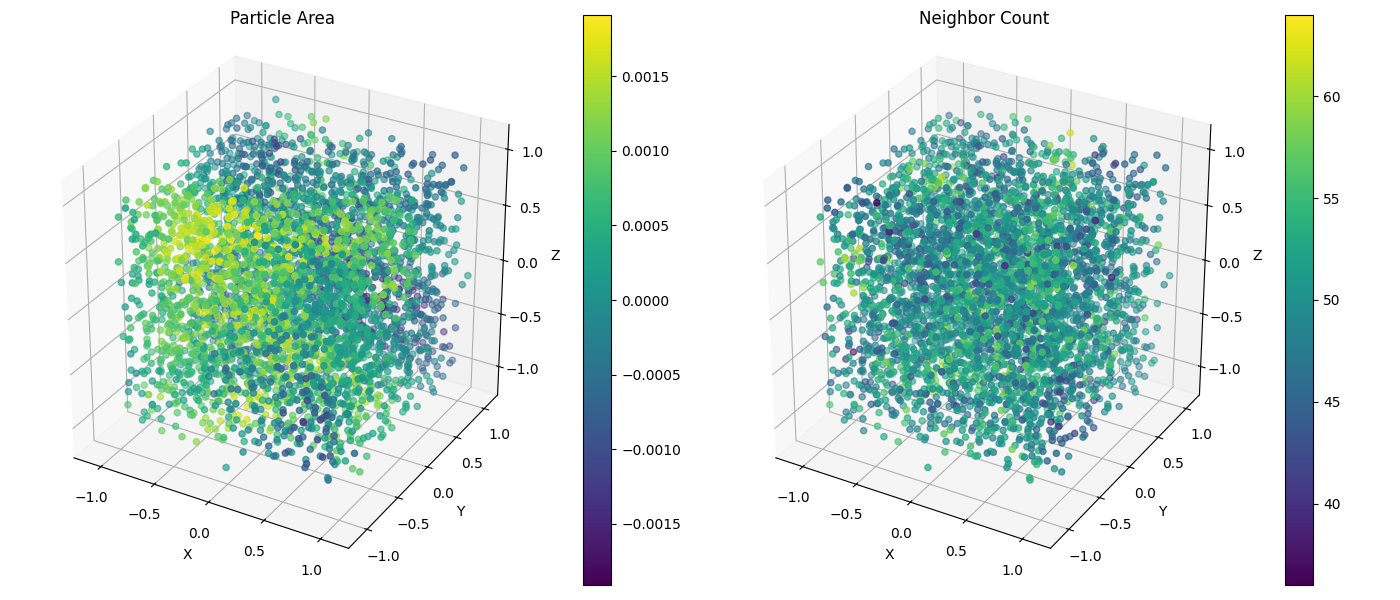

Dropdown(description='File:', layout=Layout(width='initial'), options=('datasets/SFBC_dataset_IV/dataset/highJ…

IntSlider(value=0, description='Slider:', max=0)

In [20]:
from BasisConvolution.util.dataPlotting import getFileCount, getPreparePlotFunction, getUpdatePlotFunction
import matplotlib.pyplot as plt
import ipywidgets as widgets

# datasetPath = 'datasets/SFBC_dataset_I/dataset'
# datasetPath = 'datasets/SFBC_dataset_II/dataset/train'
# datasetPath = 'datasets/SFBC_dataset_III/dataset/train'
datasetPath = 'datasets/SFBC_dataset_IV/dataset'

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

plotState = getPreparePlotFunction(train_ds.fileFormat)(train_ds, hyperParameterDict)
updateFn = getUpdatePlotFunction(train_ds.fileFormat)

dropdown = widgets.Dropdown(options=train_ds.fileNames, description='File:', layout={'width': 'initial'})
slider = widgets.IntSlider(min=0, max=getFileCount(train_ds.fileNames[0]), value=0, description='Slider:')

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        slider.max = getFileCount(change['new'])
        if slider.value > slider.max:
            slider.value = 0
        # print(change['new'], slider.value)
        updateFn(plotState, train_ds, hyperParameterDict, [change['new'], slider.value, None, None, None])

def on_change_slider(change):
    if change['type'] == 'change' and change['name'] == 'value':   
        # print(change['new'])
        updateFn(plotState, train_ds, hyperParameterDict, [dropdown.value, change['new'], None, None, None])

dropdown.observe(on_change)
slider.observe(on_change_slider)

display(dropdown)
display(slider)

In [16]:
len(train_ds.fileNames)

36

In [20]:
from BasisConvolution.util.hyperparameters import parseHyperParameters, setSeeds, finalizeHyperParameters

In [21]:
# import warnings
# from datetime import datetime
# import torch
# import numpy as np
# import random


In [22]:
# datasetPath = '~/dev/SFBC/datasets/test_case_I'


In [23]:
# hyperParameterDict = parseHyperParameters("", None)
# hyperParameterDict['fluidFeatures'] = 'constant:1' if train_ds.fileFormat != 'testcase_IV' else 'attribute:a'
# hyperParameterDict['boundaryFeatures'] = 'constant:1'
# hyperParameterDict['groundTruth'] = 'compute[rho]:constant:1/constant:rho0'
# hyperParameterDict['frameDistance'] = 0
# hyperParameterDict['maxUnroll'] = 1
# hyperParameterDict['basisFunctions'] = 'ffourier_even'
# hyperParameterDict['device'] = 'cuda'
# hyperParameterDict['dtype'] = torch.float32

# train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))

# finalizeHyperParameters(hyperParameterDict, train_ds)

# # print(hyperParameterDict['progressLabel'])



In [24]:
# hyperParameterDict['layers']

In [25]:
# fluidFeatureCount = hyperParameterDict['fluidFeatureCount']
# boundaryFeaturecount = hyperParameterDict['boundaryFeatureCount']
# layers = hyperParameterDict['layers']
# coordinateMapping = hyperParameterDict['coordinateMapping']
# windowFunction = getWindowFunction(hyperParameterDict['windowFunction'])

# rbfs = hyperParameterDict['rbfs']
# dims = hyperParameterDict['dims']

# cutlassBatchSize = hyperParameterDict['cutlassBatchSize']
# normalized = hyperParameterDict['normalized']
# outputBias = hyperParameterDict['outputBias']
# initializer = hyperParameterDict['initializer']
# optimizeWeights = hyperParameterDict['optimizeWeights']
# exponentialDecay = hyperParameterDict['exponentialDecay']
# inputEncoder = hyperParameterDict['inputEncoder'] if 'inputEncoder' in hyperParameterDict else None
# outputDecoder = hyperParameterDict['outputDecoder'] if 'outputDecoder' in hyperParameterDict else None
# edgeMLP = hyperParameterDict['edgeMLP'] if 'edgeMLP' in hyperParameterDict else None
# vertexMLP = hyperParameterDict['vertexMLP'] if 'vertexMLP' in hyperParameterDict else None


# print(f'fluidFeatureCount: {fluidFeatureCount}')
# print(f'boundaryFeaturecount: {boundaryFeaturecount}')
# print(f'layers: {layers}')
# print(f'coordinateMapping: {coordinateMapping}')
# print(f'windowFunction: {windowFunction}')

# print(f'rbfs: {rbfs}')
# print(f'dims: {dims}')

# print(f'cutlassBatchSize: {cutlassBatchSize}')
# print(f'normalized: {normalized}')
# print(f'outputBias: {outputBias}')
# print(f'initializer: {initializer}')
# print(f'optimizeWeights: {optimizeWeights}')
# print(f'exponentialDecay: {exponentialDecay}')
# print(f'inputEncoder: {inputEncoder}')
# print(f'outputDecoder: {outputDecoder}')
# print(f'edgeMLP: {edgeMLP}')
# print(f'vertexMLP: {vertexMLP}')

In [26]:
# def runInference(perennialState, config, model, batches = 1, verbose = False):
#     i, j = perennialState['fluid']['neighborhood']['indices']
#     distances = perennialState['fluid']['neighborhood']['distances'].view(-1,1) * perennialState['fluid']['neighborhood']['vectors']
#     return model(perennialState['fluid']['features'], i, j, distances, verbose = verbose)

In [28]:
from BasisConvolution.util.arguments import parser
import shlex
from torch.optim import Adam


In [29]:
# display(model)

In [30]:
# datasetPath = '~/dev/SFBC/datasets/test_case_II/train'

# args = parser.parse_args(shlex.split(f'--boundaryFeatures constant:1 --fluidFeatures constant:1 --groundTruth compute[rho]:constant:1/constant:rho0 --basisFunctions {basisFunction} --basisTerms {basisTerms} --windowFunction {windowFunction} --maxUnroll 0 --frameDistance 0 --epochs 1'))

# hyperParameterDict = parseHyperParameters(args, None)
# hyperParameterDict['device'] = 'cuda'
# hyperParameterDict['iterations'] = 2**10

# train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))
# print(len(train_ds))
# train_loader = DataLoader(train_ds, shuffle=True, batch_size = hyperParameterDict['batchSize']).batch_sampler
# train_iter = iter(train_loader)

# finalizeHyperParameters(hyperParameterDict, train_ds)

# # print(hyperParameterDict['progressLabel'])

# model, optimizer, scheduler = buildModel(hyperParameterDict, verbose = True)

# model = model.train()

# losses = []
# psnrs = []
# bdatas = []
# # bdata = next(train_iter)
# for i in (t:=tqdm(range(hyperParameterDict['totalIterations']), leave = False)):
#     try:
#         bdata = next(train_iter)
#     except StopIteration:
#         train_iter = iter(train_loader)
#         bdata = next(train_iter)
#     bdatas.append(bdata)
#     config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(bdata[0], train_ds, hyperParameterDict)

#     optimizer.zero_grad()
#     prediction = runInference(currentState, config, model, verbose = True)

#     break

In [31]:
hyperParameterDict['device']

'cuda'

In [32]:
# datasetPath = '~/dev/SFBC/datasets/test_case_II/train'
basisFunction = 'ffourier'
basisTerms = 4
windowFunction = 'None'

args = parser.parse_args(shlex.split(f'--fluidFeatures constant:1 --boundaryFeatures constant:1 --groundTruth compute[rho]:constant:1/constant:rho0 --basisFunctions {basisFunction} --basisTerms {basisTerms} --windowFunction {windowFunction} --maxUnroll 0 --frameDistance 0 --epochs 1'))

hyperParameterDict = parseHyperParameters(args, None)
hyperParameterDict['device'] = 'cuda'
hyperParameterDict['iterations'] = 2**10

train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))
print(len(train_ds))
train_loader = DataLoader(train_ds, shuffle=True, batch_size = hyperParameterDict['batchSize']).batch_sampler
train_iter = iter(train_loader)

finalizeHyperParameters(hyperParameterDict, train_ds)

config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(123, train_ds, hyperParameterDict)


115164


In [34]:
import pandas as pd
from BasisConvolution.util.hyperparameters import make_hash, toPandaDict
from BasisConvolution.util.network import buildModel, runInference
database = pd.DataFrame()

In [35]:
models = []

t = None
basisFunctions = ['ffourier', 'linear', 'ffourier_even', 'ffourier_odd', 'chebyshev']
for basisFunction in basisFunctions:
    # for basisTerms in [2,4,8]:
    for basisTerms in [4]:
        for windowFunction in ['None']:
            # print('Training for ', basisFunction, basisTerms, windowFunction)
            # args = parser.parse_args(shlex.split(f'--fluidFeatures attribute:a --groundTruth compute[rho]:constant:1/constant:rho0 --basisFunctions {basisFunction} --basisTerms {basisTerms} --windowFunction {windowFunction} --maxUnroll 0 --frameDistance 0 --epochs 1'))
            args = parser.parse_args(shlex.split(f'--fluidFeatures constant:1 --boundaryFeatures constant:1 --groundTruth compute[rho]:constant:1/constant:rho0 --basisFunctions {basisFunction} --basisTerms {basisTerms} --windowFunction {windowFunction} --maxUnroll 0 --frameDistance 0 --epochs 1'))

            hyperParameterDict = parseHyperParameters(args, None)
            hyperParameterDict['device'] = 'cuda'
            hyperParameterDict['iterations'] = 2**10
            # t.


            train_ds = datasetLoader(processFolder(hyperParameterDict, datasetPath))
            # print(len(train_ds))
            train_loader = DataLoader(train_ds, shuffle=True, batch_size = hyperParameterDict['batchSize']).batch_sampler
            train_iter = iter(train_loader)

            finalizeHyperParameters(hyperParameterDict, train_ds)

            if t is None:
                t = tqdm(range(hyperParameterDict['totalIterations']))
            t.reset( hyperParameterDict['totalIterations'])
            # t.n =
            t.set_description(f'{basisFunction} - {basisTerms} - {windowFunction}')

# print(hyperParameterDict['progressLabel'])

            model, optimizer, scheduler = buildModel(hyperParameterDict, verbose = False)

            model = model.train()

            losses = []
            psnrs = []
            bdatas = []
            # bdata = next(train_iter)
            for i in (range(hyperParameterDict['totalIterations'])):
                try:
                    bdata = next(train_iter)
                except StopIteration:
                    train_iter = iter(train_loader)
                    bdata = next(train_iter)
                bdatas.append(bdata)
                config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(bdata[0], train_ds, hyperParameterDict)

                optimizer.zero_grad()
                prediction = runInference(currentState, config, model, verbose = False)
                gt = trajectoryStates[0]['fluid']['target']

                loss = torch.nn.functional.mse_loss(prediction, gt)
                
                psnr = 20 * torch.log10(gt.abs().max()) - 10 * torch.log10(loss)

                loss.backward()
                losses.append(loss.item())
                psnrs.append(psnr.item())
                optimizer.step()
                t.set_description(f'{bdata} - {hyperParameterDict["progressLabel"]} - Loss: {loss.item():.4e}, PSNR: {psnr.item():.2f} [max: {gt.abs().max():.2g}]')
                t.update()
                t.refresh()
            dataFrame = pd.DataFrame([toPandaDict(hyperParameterDict)] * len(bdatas))

            dataFrame['batches'] = bdatas
            dataFrame['losses'] = losses
            dataFrame['psnrs'] = psnrs
            dataFrame['iteration'] = np.arange(len(bdatas))

            database = pd.concat([database, dataFrame], ignore_index = True)
            models.append(model)

            # break
        # break
    # break

  0%|          | 0/1024 [00:00<?, ?it/s]

In [36]:
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_391192/3451570809.py:2: DeprecationWarning: Please import `gaussian_filter1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import gaussian_filter1d


In [37]:
basisTerms = database['basisTerms'].unique()
basisFunctions = database['basisFunctions'].unique()

print(basisTerms)
print(basisFunctions)

hues = sns.color_palette(n_colors = len(basisFunctions))
linestyles = ['--', '-', ':', '-.']

[4]
['ffourier' 'linear' 'ffourier_even' 'ffourier_odd' 'chebyshev']


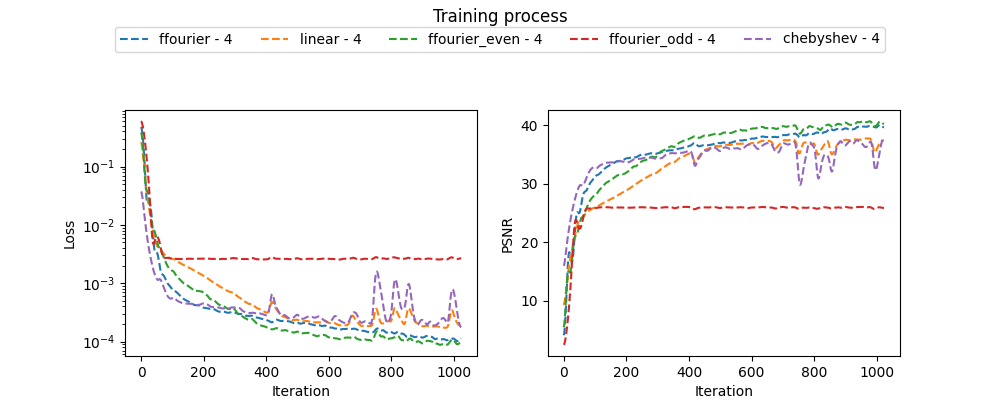

In [38]:
fig, axis = plt.subplots(1,2, figsize = (10,4), sharey = False, squeeze= False)

for i, basisFunction in enumerate(basisFunctions):
    for j, basisTerm in enumerate(basisTerms):
        subDatabase = database[(database['basisFunctions'] == basisFunction) & (database['basisTerms'] == basisTerm)]
        # subDatabase = subDatabase[subDatabase['dimension'] == 3]

        iters = subDatabase['iteration']
        losses = subDatabase['losses']
        psnrs = subDatabase['psnrs']

        losses = gaussian_filter1d(losses, sigma = 5)
        psnrs = gaussian_filter1d(psnrs, sigma = 5)

        axis[0,0].plot(iters, losses, label = f'{basisFunction} - {basisTerm}', color = hues[i], ls = linestyles[j])
        axis[0,1].plot(iters, psnrs, label = f'{basisFunction} - {basisTerm}', color = hues[i], ls = linestyles[j])

axis[0,0].set_yscale('log')
axis[0,0].set_xlabel('Iteration')
axis[0,0].set_ylabel('Loss')
# axis[0,0].legend(ncol = 2)

axis[0,1].set_xlabel('Iteration')
axis[0,1].set_ylabel('PSNR')

handles, labels = axis[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol = 5,bbox_to_anchor=(0.5, 0.95))

fig.suptitle('Training process')
fig.subplots_adjust(top = 0.725)
# fig.bbox_inches = 'tight'

# fig.tight_layout()

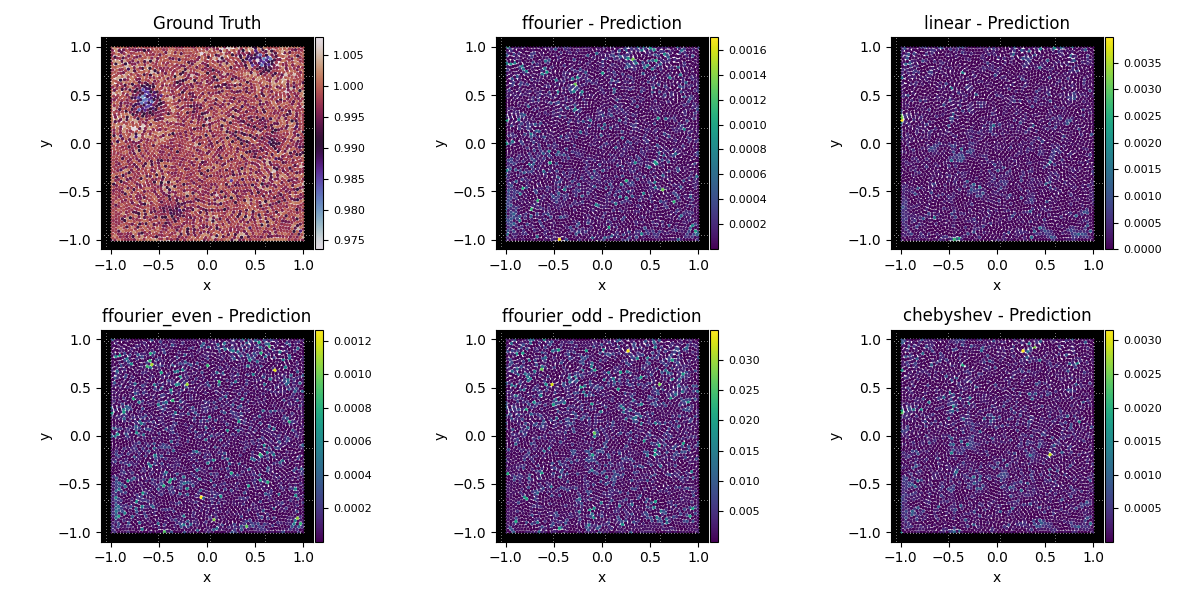

In [42]:
s = 0.5
config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(1052, train_ds, hyperParameterDict)
# if currentState['fluid']['positions'].shape[1] == 2:
deAugmentedState = augmentState(copy.deepcopy(currentState), augRotation = currentState['augmentRotation'].T if 'augmentRotation' in currentState else None, augmentFeatures=False)
visualizationState = prepVisualizationState(deAugmentedState, config)


fig, axis = plt.subplots(2,3, figsize = (12,6), sharey = False, squeeze= False)

plotState = visualizeParticleQuantity(fig, axis[0,0], config, visualizationState, quantity = trajectoryStates[0]['fluid']['target'], mapping = '.x', s = s*4, 
                            scaling = 'lin', gridVisualization=False, cmap = 'twilight', title = 'Ground Truth', plotBoth=True, which = 'fluid')

for ax, model, basis in zip(axis.flatten()[1:], models, basisFunctions):

    prediction = runInference(currentState, config, model, verbose = False)
    loss = (prediction - trajectoryStates[0]['fluid']['target'])**2
    plotState = visualizeParticleQuantity(fig, ax, config, visualizationState, quantity = loss, mapping = '.x', s = s*4, 
                            scaling = 'lin', gridVisualization=False, cmap = 'viridis', title = f'{basis} - Prediction', plotBoth=True, which = 'fluid')


for ax in axis.flatten():
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)


fig.tight_layout()

In [ ]:
from diffSPH.v2.plotting import prepVisualizationState, visualizeParticleQuantity, updatePlot

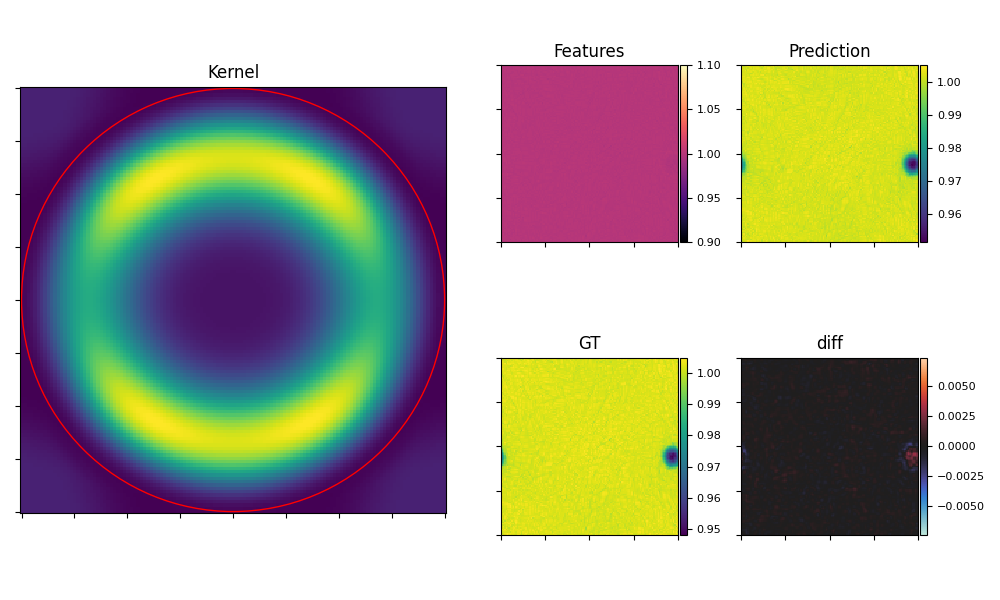

In [ ]:


deAugmentedState = augmentState(copy.deepcopy(currentState), augRotation = currentState['augmentRotation'].T if 'augmentRotation' in currentState else None)
visualizationState = prepVisualizationState(currentState, config)

s = 0.5
fig, axis = plt.subplot_mosaic('''AABC
                               AADE''', figsize=(10,6), sharex = False, sharey = False)

featurePlot = visualizeParticleQuantity(fig, axis['B'], config, visualizationState, quantity = 'features', mapping = '.x', s = s, 
                          scaling = 'lin', gridVisualization=True, cmap = 'magma', title = 'Features')

predictionPlot = visualizeParticleQuantity(fig, axis['C'], config, visualizationState, quantity = prediction[:,0], mapping = '.x', s = s, 
                          scaling = 'lin', gridVisualization=True, cmap = 'viridis', title = 'Prediction')
groundTruthPlot = visualizeParticleQuantity(fig, axis['D'], config, visualizationState, quantity = gt, mapping = '.x', s = s, 
                          scaling = 'lin', gridVisualization=True, cmap = 'viridis', title = 'GT')

lossPlot = visualizeParticleQuantity(fig, axis['E'], config, visualizationState, quantity = prediction - gt, mapping = '.x', s = s, 
                          scaling = 'sym', gridVisualization=True, cmap = 'icefire', title = 'diff', midPoint=0.0)

nx = 128
xx = np.linspace(-1, 1, nx)
yy = np.linspace(-1, 1, nx)
X, Y = np.meshgrid(xx, yy)
positions = torch.tensor(np.stack([X.flatten(), Y.flatten()]).T, device = currentState['fluid']['positions'].device, dtype = currentState['fluid']['positions'].dtype)

centralPosition = torch.tensor([[0.0, 0.0]], device = currentState['fluid']['positions'].device, dtype = currentState['fluid']['positions'].dtype)

distances = (positions - centralPosition).norm(dim = 1).view(-1,1) * (positions - centralPosition)

synthetic_i = torch.arange(0, positions.shape[0], device = currentState['fluid']['positions'].device, dtype = torch.long).flatten()
synthetic_j = torch.zeros_like(synthetic_i)

synthetic_features = torch.ones(positions.shape[0], device = currentState['fluid']['positions'].device, dtype = currentState['fluid']['positions'].dtype).view(-1,1)

synthetic = model(synthetic_features, synthetic_i, synthetic_j, distances, verbose = False)

sc = axis['A'].pcolormesh(X, Y, synthetic[:,0].detach().cpu().numpy().reshape(nx, nx), cmap = 'viridis')
circle = plt.Circle((0, 0), 1, color='r', fill=False)
axis['A'].add_artist(circle)
axis['A'].set_aspect('equal')
axis['A'].set_title('Kernel')

for ax in axis.values():
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

fig.tight_layout()


In [ ]:
visualizationState = prepVisualizationState(currentState, config)

for i in (t:=tqdm(range(1024))):
    optimizer.zero_grad()
    prediction = runInference(currentState, config, model, verbose = False)
    gt = trajectoryStates[0]['fluid']['target']

    loss = torch.nn.functional.mse_loss(prediction, gt)
    loss.backward()
    optimizer.step()
    t.set_description(f'Loss: {loss.item():.4e}')
    if i % 32 == 0:
        updatePlot(featurePlot, visualizationState, 'features')
        updatePlot(predictionPlot, visualizationState, prediction[:,0])
        updatePlot(groundTruthPlot, visualizationState, gt)
        updatePlot(lossPlot, visualizationState, prediction - gt)

        synthetic = model(synthetic_features, synthetic_i, synthetic_j, distances, verbose = False)
        sc.set_array(synthetic[:,0].detach().cpu().numpy().reshape(nx, nx).flatten())

        fig.canvas.draw()
        fig.canvas.flush_events()
    t.set_description(f'Loss: {loss.item():.4e}')




  0%|          | 0/1024 [00:00<?, ?it/s]

In [ ]:
# train_ds = datasetLoader(processFolder(hyperParameterDict, '~/dev/diffSPH/generative/dataset_dfsph/export'))
config, attributes, currentState, priorState, trajectoryStates = loadAugmentedFrame(1024, train_ds, hyperParameterDict)

optimizer.zero_grad()
prediction = runInference(currentState, config, model, verbose = False)
gt = trajectoryStates[0]['fluid']['target']

loss = torch.nn.functional.mse_loss(prediction, gt)
# loss.backward()
# optimizer.step()

tensor(0.4854, grad_fn=<MseLossBackward0>)


In [ ]:

# print(synthetic)

In [ ]:
print(synthetic_i)
print(synthetic_j)
print(synthetic)

tensor([   0,    1,    2,  ..., 1021, 1022, 1023])
tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([[ 0.0382],
        [ 0.0382],
        [ 0.0382],
        ...,
        [-0.0071],
        [-0.0071],
        [-0.0071]], grad_fn=<cutlassBackward>)


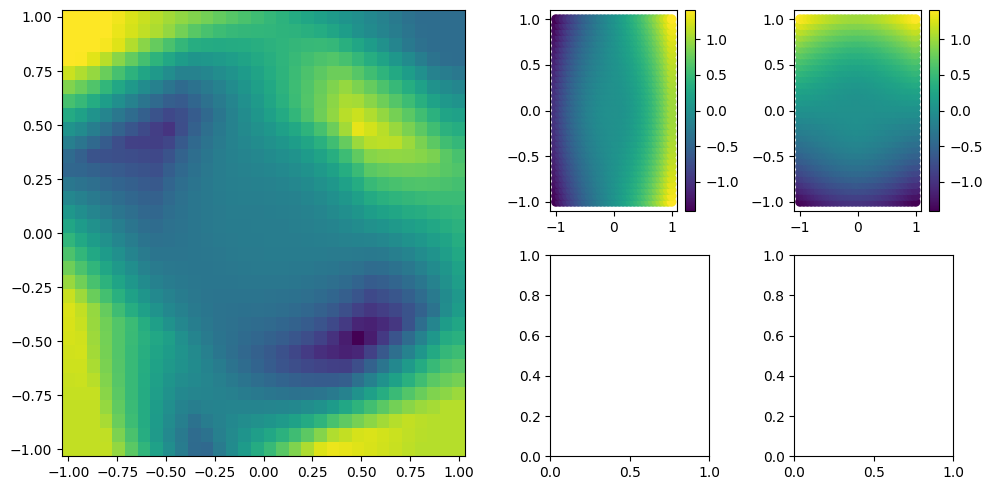

In [ ]:

fig, axis = plt.subplot_mosaic('''AABC
                               AADE''', figsize=(10,5), sharex = False, sharey = False)

# sc = axis['B'].imshow(distances[:,0].detach().cpu().numpy().reshape(16,16), cmap = 'viridis')
sc = axis['B'].scatter(positions[:,0].detach().cpu().numpy(), positions[:,1].detach().cpu().numpy(), c = distances[:,0].detach().cpu().numpy(), cmap = 'viridis')
fig.colorbar(sc, ax = axis['B'])
# sc = axis['C'].imshow(distances[:,1].detach().cpu().numpy().reshape(16,16), cmap = 'viridis')
sc = axis['C'].scatter(positions[:,0].detach().cpu().numpy(), positions[:,1].detach().cpu().numpy(), c = distances[:,1].detach().cpu().numpy(), cmap = 'viridis')
fig.colorbar(sc, ax = axis['C'])

sc = axis['A'].scatter(positions[:,0].detach().cpu().numpy(), positions[:,1].detach().cpu().numpy(), c = synthetic[:,0].detach().cpu().numpy(), cmap = 'viridis')

sc = axis['A'].pcolormesh(X, Y, synthetic[:,0].detach().cpu().numpy().reshape(nx, nx), cmap = 'viridis')

fig.tight_layout()

In [ ]:
    i, j = perennialState['fluid']['neighborhood']['indices']
    distances = perennialState['fluid']['neighborhood']['distances'].view(-1,1) * perennialState['fluid']['neighborhood']['vectors']
    return model(perennialState['fluid']['features'], i, j, distances, verbose = verbose)

In [ ]:
config['particle']['support']

0.059292720702474794

In [ ]:
currentState['fluid']['supports']

tensor([0.0593, 0.0593, 0.0593,  ..., 0.0593, 0.0593, 0.0593])

In [ ]:
# visualizationState

In [ ]:
config['kernel']

{'kernelScale': tensor(1.8974),
 'name': 'Wendland2',
 'targetNeighbors': 45.238956,
 'function': <diffSPH.kernels.KernelWrapper at 0x7e525f037c50>}

In [ ]:
from features import getFeatures

In [ ]:
searchNeighbors(priorState, config, True)

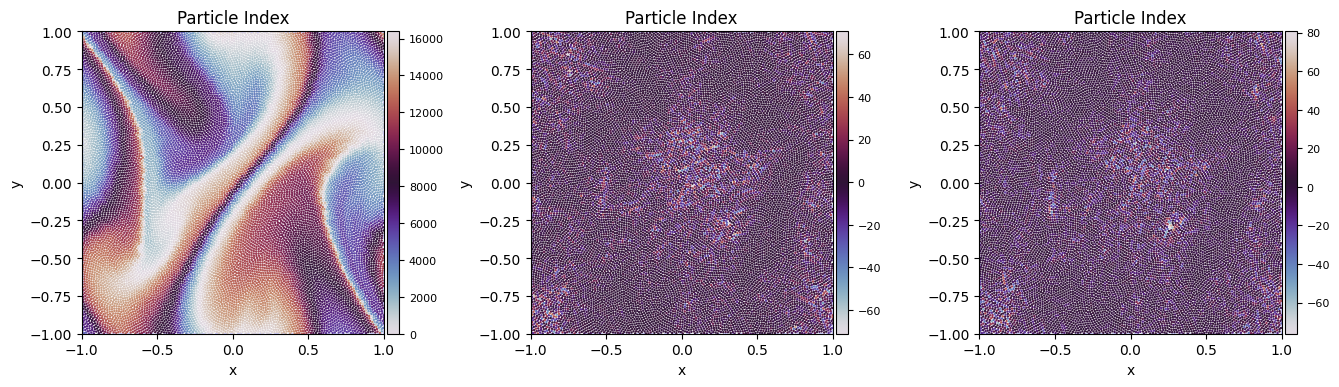

In [ ]:
import copy
from augment import augmentState
from diffSPH.v2.plotting import prepVisualizationState, visualizeParticleQuantity

# currentState['fluid']['features'] = getFeaturev2('attribute@rho / attribute@rho', currentState['fluid'], priorState['fluid'], config)
# currentState['fluid']['features'] = getFeatures(['attribute@u.x', 'attribute@u.y'], currentState['fluid'], priorState['fluid'], config)
# currentState['fluid']['features'] = getFeatures(['attribute:x*constant:-1'], currentState['fluid'], priorState['fluid'], config)

currentState['fluid']['features'] = getFeatures(['diff:compute[gradSym]:constant=1*attribute:rho'], currentState['fluid'], priorState['fluid'], config, currentState['time'] - priorState['time'])


deAugmentedState = augmentState(copy.deepcopy(currentState), augRotation = currentState['augmentRotation'].T if 'augmentRotation' in currentState else None)
visualizationState = prepVisualizationState(deAugmentedState, config)

s = 0.5
fig, axis = plt.subplot_mosaic('''ABC''', figsize=(13.5,5), sharex = False, sharey = False)

visualizeParticleQuantity(fig, axis['A'], config, visualizationState, quantity = 'indices', mapping = '.x', s = s, 
                          scaling = 'lin', gridVisualization=False, cmap = 'twilight', title = 'Particle Index')

visualizeParticleQuantity(fig, axis['B'], config, visualizationState, quantity = 'features', mapping = '.x', s = s, 
                          scaling = 'lin', gridVisualization=False, cmap = 'twilight', title = 'Particle Index')
visualizeParticleQuantity(fig, axis['C'], config, visualizationState, quantity = 'features', mapping = '.y', s = s, 
                          scaling = 'lin', gridVisualization=False, cmap = 'twilight', title = 'Particle Index')

fig.tight_layout()

In [ ]:
config['fluid']

{'cs': 20, 'mu': 0.1, 'rho0': 1000}

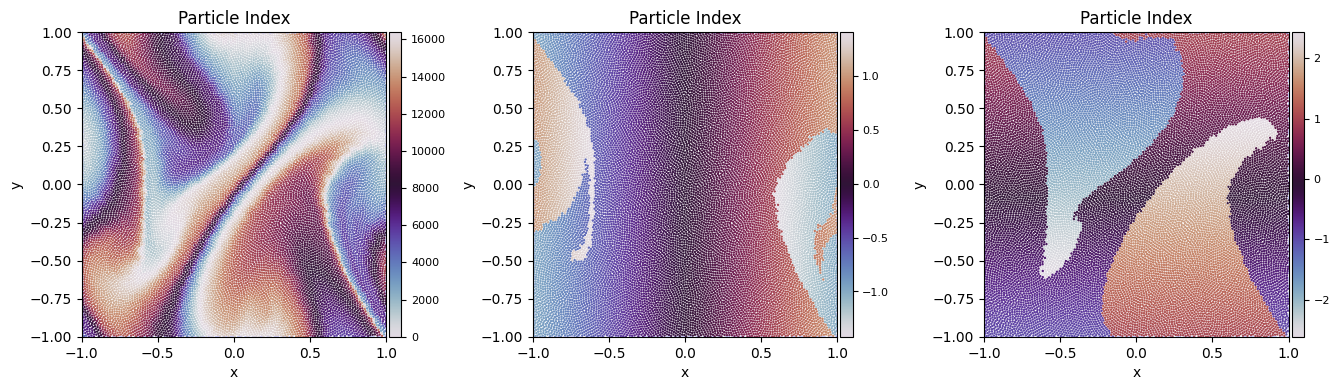